# Cheatsheets
https://wch.github.io/latexsheet/ - Latex

# Notebook Link
TBD

# Initial programming environment preparations

In [1]:
import numpy as np
from sympy import dsolve, Eq, symbols, Function
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.core.display import HTML
from pylab import rcParams
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import ArtistAnimation
from scipy.integrate import odeint
import math
from sympy import collect, expand, Function, Symbol
from sympy import init_printing
from sympy import sin, tan, cos, sinh, cosh, tanh
from sympy.simplify.trigsimp import trigsimp_groebner

In [2]:
%matplotlib inline
rc('animation', html='jshtml')
#rcParams['figure.figsize'] = 10, 5
HTML("""
<style>
.animation {
    display: table-cell;
    vertical-align: left;
    align: left;
}
</style>
""")

In [3]:
def init_fig():
    fig, ax = plt.subplots()
    line, = ax.plot([], [], lw=2)
    #plt.close(fig)
    return fig,ax,line

def init_fig_3d():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    line, = ax.plot([], [], [], lw=3)
    return fig,ax,line

def init():
    line, = ax.plot([], [], lw=2)
    line.set_data([], [])
    return (line,)

def init_multi():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(func,frames,interval):    
    plt.close(fig)
    return animation.FuncAnimation(fig, func, init_func=init,
                                       frames=frames, interval=interval, 
                                       blit=True)
    
def set_figure(ax,xlim,ylim,xlabel,ylabel,title):
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [4]:
def newmark(f,t,m,h,k,x0):
    '''Newmark integrator
    x0 = [3 x 1] array where the index represents the order of integration
    example - x0[0] = x, x0[1] = x', x0[2] = x''
    '''
    x = np.zeros(3) # prepare array for new values
    x[2] = (f - (h*t/2 + k*t*t/4) * x0[2] - (h+k*t) * x0[1] - k*x0[0]) / (m + h*t/2 + k*t*t/4)
    x[1] = x0[1] + (x0[2]+x[2]) * t/2
    x[0] = x0[0] + x0[1]*t + (x0[2] + x[2]) * t*t/4

    return x

# Task 1
## Outline
System with escapes. Henoin – Heiles (HH) system. The governing equations of motion for the HH system read:

$\begin{cases} \frac{d^2 x}{dt^2} = -y - 2xy \\ \frac{d^2 y}{dt^2} = -y - x^2+y^2 \end{cases}$


The total energy of the system is:

$E = \frac{1}{2}((\frac{dx}{dt})^2 + (\frac{dy}{dt})^2) + \frac{1}{2} (x^2+y^2) + x^2y - \frac{1}{3}y^3 $

Set $x(t_0 = 0) =0$ and fix the energy level $E$. Then, you are free to select $y(t_0 = 0) =y_0$ and $\frac{dy}{dt}(t_0 = 0) = \dot{y_0}$. Integrate the system of ODE and plot the trajectories in {$y,\frac{dy}{dt}$} phase plane. Find such
energies when trajectories become unbounded. Try to plot the contours of the system energy and plot the
trajectories on top of the pattern of contour lines. Determine such energies when all trajectories escape the
central region. Associate different escape gates with different colors – and mark initial conditions by points
with corresponding colors. Change the energy level and construct different plots of initial conditions.
Discuss the results.

In [27]:
def henoin_heiles(x,t): #x0,y0,dx0,dy0
    dx = [0,0,0,0]
    dx[0] = x[2]
    dx[1] = x[3]
    dx[2] = -x[1] - 2*x[0]*x[1]
    dx[3] = -x[1] - x[0]**2 + x[1]**2
    return dx

def hh_energy(x0,y0,x1,y1):
    return 1/2 * (x1**2 + y1**2) + 1/2 * (x0**2 + y0**2) + (x0**2)*y0 - 1/3 * y0**3

def hh_dx0(e,x0,y0,y1):
    inner = 2 * (e - (1/2 * (x0**2 + y0**2) + (x0**2)*y0 - 1/3 * y0**3)) - y1**2
    if inner > 0:
        return math.sqrt(inner)
    else:
        return -1

def hh_force(e,x0,y0):
    return e - (1/2 * (x0**2 + y0**2) + (x0**2)*y0 - 1/3 * y0**3)

In [66]:
def plot_escape_trajectories_yx(e):
    fig, ax = plt.subplots()
    m,h,k = 1,0.1,0
    t = 0
    dt = 0.01
    iterations = 200
    xs = []
    t = 0
    y1 = 1
    x0 = 0
    y0 = 0
    dy0 = 0

    x_all = np.arange(-3,3,0.3)
    y_all = np.arange(-3,3,0.3)

    for y0 in x_all:
        for dy0 in y_all:
            dx0 = hh_dx0(e,x0,y0,dy0)
            if dx0 != -1:
                x = [x0,y0,dx0,dy0]

                tmax = 50.0
                t = np.arange(0.0, tmax, 0.1)
                f = odeint(henoin_heiles, (x), t)
                x,y,dx,dy = f.T
                i = 0
                for val in range(len(x)):
                    if y[i] == 0 or dy[i] == 0:
                        y = np.delete(y,i)
                        dy = np.delete(dy,i)
                        #del x.remove[i]
                        #del y[i]
                    else:
                        i+= 1
                plt.plot(y,dy)

    set_figure(ax,(-10,10),(-10,10),'$y$','$dy$',f"HH system trajectories, E = {e}")
    plt.show()

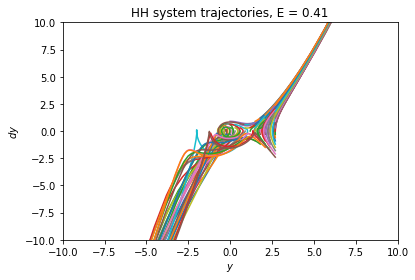

In [67]:
plot_escape_trajectories_yx(0.41)

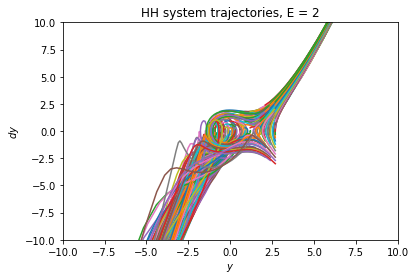

In [68]:
plot_escape_trajectories_yx(2)

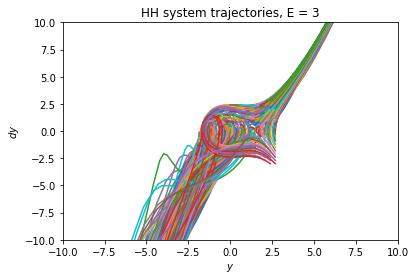

In [69]:
plot_escape_trajectories_yx(3)

In [59]:
def plot_escape_trajectories(e):
    fig, ax = plt.subplots()
    m,h,k = 1,0.1,0
    t = 0
    dt = 0.01
    iterations = 200
    xs = []
    t = 0
    y1 = 1
    x0 = 0
    y0 = 0
    dy0 = 0

    x_all = np.arange(-3,3,0.3)
    y_all = np.arange(-3,3,0.3)

    for x0 in x_all:
        for y0 in y_all:
            dx0 = hh_dx0(e,x0,y0,dy0)
            if dx0 != -1:
                x = [x0,y0,dx0,dy0]

                tmax = 50.0
                t = np.arange(0.0, tmax, 0.1)
                f = odeint(henoin_heiles, (x), t)
                x,y,dx,dy = f.T
                i = 0
                for val in range(len(x)):
                    if x[i] == 0 or y[i] == 0:
                        x = np.delete(x,i)
                        y = np.delete(y,i)
                        #del x.remove[i]
                        #del y[i]
                    else:
                        i+= 1
                plt.plot(x,y)

    set_figure(ax,(-10,10),(-10,10),'$x$','$y$',f"HH system, E = {e}")
    plt.show()

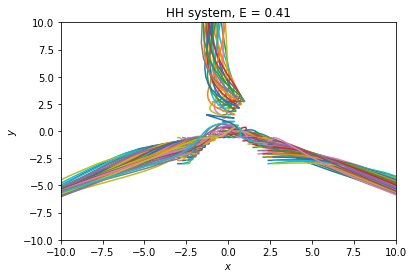

In [60]:
plot_escape_trajectories(0.41)

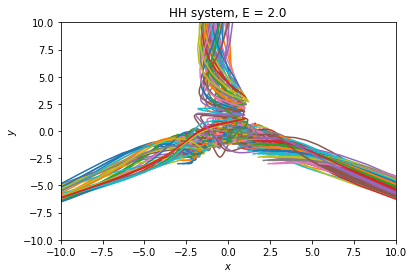

In [62]:
plot_escape_trajectories(2.0)

In [17]:
def exit_detector(x,y):
    if y > 10:
        return 1
    elif y < -2:
        if x < -10:
            return 2
        elif x > 10:
            return 3
    return 4

In [61]:
def plot_escapes(e):
    fig, ax = plt.subplots()
    m,h,k = 1,0.1,0
    t = 0
    dt = 0.01
    iterations = 200
    xs = []
    t = 0
    y1 = 1

    x0 = 0
    y0 = 0
    dy0 = 0

    x_all = np.arange(-3,3,0.1)
    y_all = np.arange(-3,3,0.1)

    for x0 in x_all:
        for y0 in y_all:
            dx0 = hh_dx0(e,x0,y0,dy0)
            if dx0 != -1:
                x = [x0,y0,dx0,dy0]

                tmax = 50.0
                t = np.arange(0.0, tmax, 0.1)
                f = odeint(henoin_heiles, (x), t)
                x,y,dx,dy = f.T
                i = 0
                for val in range(len(x)):
                    if x[i] == 0 or y[i] == 0:
                        x = np.delete(x,i)
                        y = np.delete(y,i)
                        #del x.remove[i]
                        #del y[i]
                    else:
                        i+= 1


                #plt.plot(x,y)
                exit = exit_detector(x[-1],y[-1])
                if exit == 1:
                    plt.plot(x0,y0,'ro')
                elif exit == 2:
                    plt.plot(x0,y0,'bo')
                elif exit == 3:
                    plt.plot(x0,y0,'go')

    set_figure(ax,(-3,3),(-3,3),'$y$','$\dot(y)$',f"HH system escape plot at E = {e}")
    plt.show()

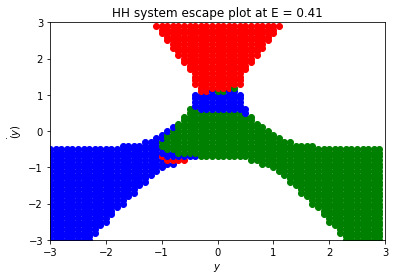

In [63]:
plot_escapes(0.41)

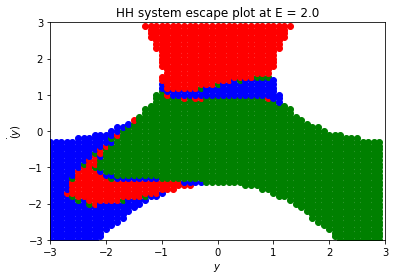

In [64]:
plot_escapes(2.0)

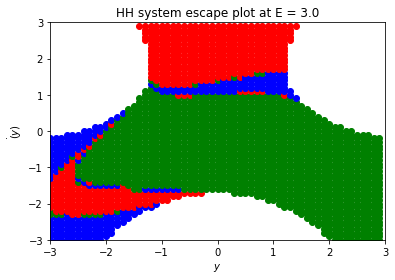

In [65]:
plot_escapes(3.0)

# Task 2
## Outline
The Logistic map $x_{k+1} = ax_k(1-x_k); 0 \leq a \leq 4 ; k = 0,1,2,...; 0 \leq x_0 \leq 4$.

Plot bifurcation diagram illustrating a cascade of period doubling bifurcations (assign parameter $a$ to the $x$-
axis and the values of the steady state process $x_k$ to the $y$- axis).

Compute and plot the Lyapunov exponent for the Logistic map. The Lyapunov exponent for a discreet iterative map is defined as $\lambda = \lim_{n\to\infty} \sum_{k=1}^n ln |\frac{df}{dx}(x_k)|$, where $f$ is the mapping function of the discreet
iterative map.

Derive the analytic expression of the non-trivial period-1 orbit, investigate its stability. Set $a$ to 1.5, 2.5 and
3.5. Use computational techniques to construct the set of non-asymptotic convergence to period-1 orbit.

## Solution
We start by plotting the logistic map using the function $a * x * (1 - x)$

In [54]:
def f(x, a):
    return a * x * (1 - x)

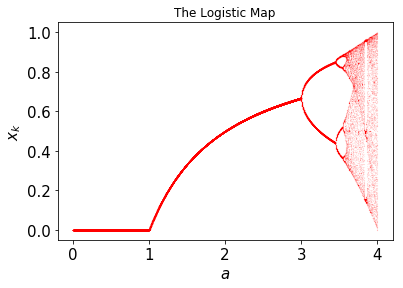

In [55]:
ys = []
a_s = np.linspace(0, 4, 2000)
for a in a_s:
    x = 0.1
    for i in range(500):
        x = f(x, a)
    for i in range(50):
        x = f(x, a)
        ys.append([a, x])
ys = np.array(ys)
plt.plot(ys[:, 0],ys[:, 1], 'r.', markersize=0.05)
plt.xlabel('$a$', fontsize=15)
plt.ylabel('$x_k$', fontsize=15)
plt.title("The Logistic Map")
plt.tick_params(labelsize=15)
plt.show()

Next we plot the Lyapunov exponent on top of the expanded view of the map

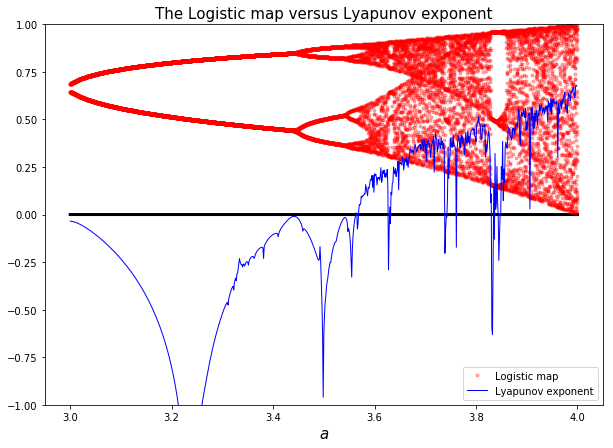

In [56]:
num_points = 16000;
result = []
lambdas = []
maps = []
xmin, xmax = 3, 4
mult=(xmax-xmin)*num_points
mu_values = np.arange(xmin, xmax, 20/num_points)
for r in mu_values:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))
    # Ignore the first 100 iterations
    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(xmin, xmax, mult)
zero = [0] * mult
ax1.plot(xticks, zero, 'k-', linewidth=3)
ax1.plot(xticks, maps, 'r.', alpha = 0.3, label='Logistic map')
ax1.set_xlabel('r')
ax1.plot(mu_values, lambdas, 'b-', linewidth=1,
label='Lyapunov exponent')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('$a$', fontsize=15)
ax1.legend(loc='best')
ax1.set_title('The Logistic map versus Lyapunov exponent', fontsize=15)
plt.show()

# Task 3
## Outline
Synchronization of chaotic oscillators. Consider two coupled Rossler oscillators:

$\begin{equation}
\begin{split}
\frac{dx_1}{dt} = -y_1 - z_1 + \epsilon(x_2 - x_1) \\
\frac{dy_1}{dt} = x_1 + ay_1 \\
\frac{dz_1}{dt} = b + z_1(x_1 - c)
\end{split}
\quad\quad
\begin{split}
\frac{dx_2}{dt} = -y_2 - z_2 + \epsilon(x_1 - x_2) \\
\frac{dy_2}{dt} = x_2 + ay_2 \\
\frac{dz_2}{dt} = b + z_2(x_2 - c)
\end{split}
\end{equation}$

Set parameters $a$ = $b$ = 0.2 and $c$ = 7. At $\epsilon$ = 0 two systems are uncoupled. Investigate a single
uncoupled system by changing parameter $c$. Construct a graphical representation of the cascade of period
doubling bifurcations leading to chaos (use Poincare sections).

Set such $\epsilon$ > 0 that the synchronization becomes phase-type synchronization and then complete synchronization.

## Solution - Part 1

We start by writing out our functions to integrate

In [34]:
def rossler_lorenz_odes(X,t,c,a,b,e):
    x1, x2, x3, y1, y2, y3 = X
    dx1 = -x2 - x3 + e*(y1-x1)
    dx2 = x1 + a*x2
    dx3 = b + x3 * (x1 - c)

    dy1 = -y2 - y3 + e*(x1-y1)
    dy2 = y1 + a*y2 + 0.2
    dy3 = b + y3 * (y1 - c) + 0.2
    
    return (dx1, dx2, dx3, dy1, dy2, dy3)

Follow that by integrating with a varying parameter $c$ while $e$ is set to 0

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


fig,ax,line = init_fig() 
timetext = ax.text(16,16,'')
lines = []
lobj = ax.plot([],[],lw=2,color='r')[0]
lines.append(lobj)
lobj = ax.plot([],[],lw=2,color='b')[0]
lines.append(lobj)
# Constants
c = 7

def animate(c,a,b,e):
    timetext.set_text(f"c: {round(c,2)}")
    #print(c)
    y0 = [-5, 0, 1, 5, 1, 1]
    tmax = 50.0
    t = np.arange(0.0, tmax, 0.1)
    X = odeint(rossler_lorenz_odes, y0, t,args=(c,a,b,e), mxstep=5000)
    x1, x2, x3, y1, y2, y3 = X.T # unpack columns
    lines[0].set_data(x1,x2)
    lines[1].set_data(y1,y2)
    return tuple(lines) + (timetext,)

c = np.arange(0,7,0.1)
sigma = 16
e = 0.0
b = 0.2
a = 0.2
r = 45.92

plt.close(fig)
anim = animation.FuncAnimation(fig, func=animate, fargs=(a,b,e,),init_func=init_multi,
                                       frames=c, interval=100, blit=True)

set_figure(ax,(-15,20),(-15,15),'x','y',"Rossler system with varying c and e = 0")

In [44]:
anim

We repeat the experiment but this time change the parameter $e$ while c is kept at 7

In [45]:
fig,ax,line = init_fig() 
timetext = ax.text(16,16,'')
lines = []
lobj = ax.plot([],[],lw=2,color='r')[0]
lines.append(lobj)
lobj = ax.plot([],[],lw=2,color='b')[0]
lines.append(lobj)
# Constants
c = 7

def animate(e,a,b,c):
    timetext.set_text(f"e: {round(e,2)}")
    #print(c)
    y0 = [-5, 0, 1, 5, 1, 1]
    tmax = 50.0
    t = np.arange(0.0, tmax, 0.1)
    X = odeint(rossler_lorenz_odes, y0, t,args=(c,a,b,e), mxstep=5000)
    x1, x2, x3, y1, y2, y3 = X.T # unpack columns
    lines[0].set_data(x1,x2)
    lines[1].set_data(y1,y2)
    return tuple(lines) + (timetext,)

e = np.arange(0,3.3,0.05)
sigma = 16
c = 7
b = 0.2
a = 0.2
r = 45.92

plt.close(fig)
anim2 = animation.FuncAnimation(fig, func=animate, fargs=(a,b,c,),init_func=init_multi,
                                       frames=e, interval=100, blit=True)

set_figure(ax,(-15,20),(-15,15),'x','y',"Rossler system with varying e and c = 7")

In [46]:
anim2

In [41]:
fig,ax,line = init_fig() 
timetext = ax.text(16,16,'')
lines = []
lobj = ax.plot([],[],lw=2,color='r')[0]
lines.append(lobj)
lobj = ax.plot([],[],lw=2,color='b')[0]
lines.append(lobj)
# Constants
c = 7

def animate(e,a,b,c):
    timetext.set_text(f"e: {round(e,2)}")
    #print(c)
    y0 = [-5, 0, 1, 5, 1, 1]
    tmax = 50.0
    t = np.arange(0.0, tmax, 0.1)
    X = odeint(rossler_lorenz_odes, y0, t,args=(c,a,b,e), mxstep=5000)
    x1, x2, x3, y1, y2, y3 = X.T # unpack columns
    lines[0].set_data(x2,y2)
    lines[1].set_data(x2,y2)
    return tuple(lines) + (timetext,)

e = np.arange(0,3.3,0.05)
sigma = 16
c = 7
b = 0.2
a = 0.2
r = 45.92

plt.close(fig)
anim3 = animation.FuncAnimation(fig, func=animate, fargs=(a,b,c,),init_func=init_multi,
                                       frames=e, interval=100, blit=True)

set_figure(ax,(-15,20),(-15,15),'x2','y2',"Rossler synchronization animation")

Finally, we check the speeds of both oscilators with each parameter $e$ to map out the synchronization

In [42]:
anim3

We may observe that the system is most syncronized when parameter $e$ is between 0.55 and 1.65

<IPython.core.display.Javascript object>


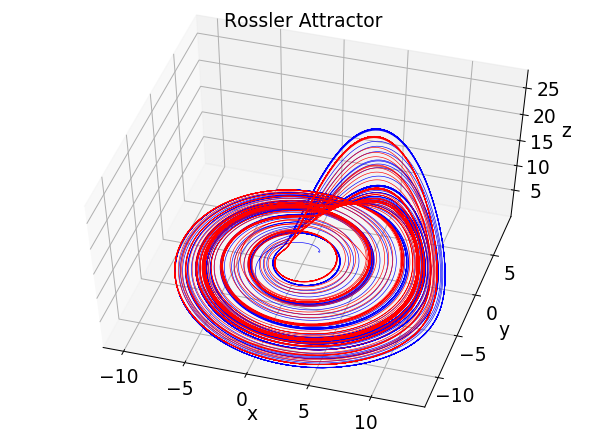

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rossler_lorenz_odes(X,t,c,a,b,e):
    x1, x2, x3, y1, y2, y3 = X
    dx1 = -x2 - x3 + e*(y1-x1)
    dx2 = x1 + a*x2
    dx3 = b + x3 * (x1 - c)

    dy1 = -y2 - y3 + e*(x1-y1)
    dy2 = y1 + a*y2 + 0.2
    dy3 = b + y3 * (y1 - c) + 0.2
    
    return (dx1, dx2, dx3, dy1, dy2, dy3)

def Rossler(x, y, z, a = 0.2, b=0.2, c=6.3):
    x_dot = - y - z
    y_dot = x + a * y
    z_dot = b + x * z - c * z
    return x_dot, y_dot, z_dot

dt = 0.01
step_count = 50000
xs=np.empty((step_count + 1,))
ys=np.empty((step_count + 1,))
zs=np.empty((step_count + 1,))

xs2=np.empty((step_count + 1,))
ys2=np.empty((step_count + 1,))
zs2=np.empty((step_count + 1,))

# The initial conditions.
#y0 = [1, 1, 1, 5, 1, 1]
c = 6.3
a = 0.2
b = 0.2
e = 0.5
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
xs2[0], ys2[0], zs2[0] = (5.0, 1.0, 1.0)
# Iterate.
tmax = 50.0
t = np.arange(0.0, tmax, 0.1)
for i in range(step_count):
    X = (xs[i], ys[i], zs[i],xs2[i], ys2[i], zs2[i])
    X0 = rossler_lorenz_odes(X,t,c,a,b,e)
    x_dot, y_dot, z_dot,x_dot2, y_dot2, z_dot2 = X0
    xs[i+1] = xs[i] + (x_dot*dt)
    ys[i+1] = ys[i] + (y_dot*dt)
    zs[i+1] = zs[i] + (z_dot*dt)
    xs2[i+1] = xs2[i] + (x_dot2*dt)
    ys2[i+1] = ys2[i] + (y_dot2*dt)
    zs2[i+1] = zs2[i] + (z_dot2*dt)
    
fig=plt.figure()
ax=Axes3D(fig)
ax.plot(xs, ys, zs,'b', lw=0.5)
ax.plot(xs2, ys2, zs2,'r', lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Rossler Attractor', fontsize=15)
plt.show()

In [2]:
%matplotlib notebook

In [19]:
dt = 0.01
step_count = 50000
c_arr = np.arange(0,10.1,0.1)
dists = []

for c in c_arr:
    xs=np.empty((step_count + 1,))
    ys=np.empty((step_count + 1,))
    zs=np.empty((step_count + 1,))

    xs2=np.empty((step_count + 1,))
    ys2=np.empty((step_count + 1,))
    zs2=np.empty((step_count + 1,))

    # The initial conditions.
    #y0 = [1, 1, 1, 5, 1, 1]
    #c = 6.3
    e = 0
    a = 0.2
    b = 0.2
    xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
    xs2[0], ys2[0], zs2[0] = (5.0, 1.0, 1.0)
    # Iterate.
    tmax = 50.0
    t = np.arange(0.0, tmax, 0.1)
    for i in range(step_count):
        X = (xs[i], ys[i], zs[i],xs2[i], ys2[i], zs2[i])
        X0 = rossler_lorenz_odes(X,t,c,a,b,e)
        x_dot, y_dot, z_dot,x_dot2, y_dot2, z_dot2 = X0
        xs[i+1] = xs[i] + (x_dot*dt)
        ys[i+1] = ys[i] + (y_dot*dt)
        zs[i+1] = zs[i] + (z_dot*dt)
        xs2[i+1] = xs2[i] + (x_dot2*dt)
        ys2[i+1] = ys2[i] + (y_dot2*dt)
        zs2[i+1] = zs2[i] + (z_dot2*dt)
    for i in range(2):
        a=xs[100]
        b=ys[100]
        r=np.sqrt(a**2 + b**2)
        dists.append([c, r])

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


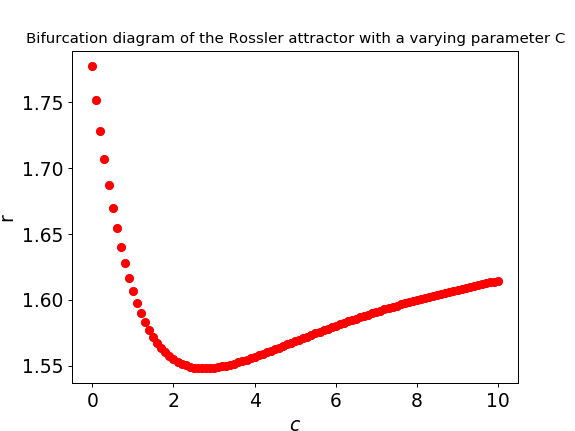

In [21]:
dists = np.array(dists)
fig, ax = plt.subplots()
#xtick_labels = np.linspace(0, interval, 5)
#ax.set_xticks([x / interval * num_steps for x in xtick_labels])
#ax.set_xticklabels(['{:.1f}'.format(xtick) for \
#xtick in xtick_labels])
plt.plot(dists[:, 0], dists[:, 1], 'ro')
plt.xlabel(r'$c$', fontsize=15)
plt.ylabel('r', fontsize=15)
plt.tick_params(labelsize=15)
plt.title("Bifurcation diagram of the Rossler attractor with a varying parameter C")
plt.show()